## Preparing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.neural_network import MLPClassifier

## Loading data

The data is from Coursera Machine Learning course/week4/ex3data1.mat.

There are 5000 training examples, each is a 20x20 pixels grayscale image of digit 0-9.

In [2]:
data = sio.loadmat('../data/data5.mat')
X = data['X']  # The 20x20 grid of pixels is unrolled into a 400-dimensional vector.
               # Thus X.shape = (5000, 400).
y = data['y']  # The label for 5000 training examples.
               # Note: digit '0' is labeled as '10'.

## Visualizing data

We randomly select 100 handwritten digit pictures to visualize:

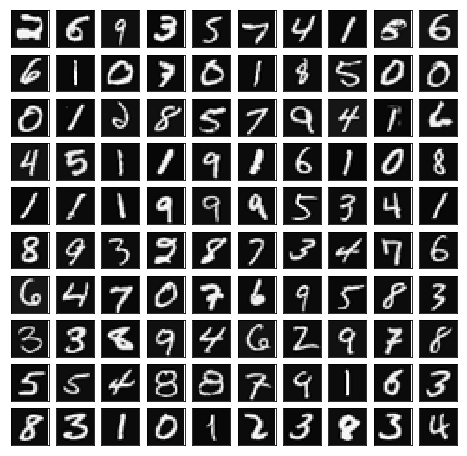

In [3]:
# Randomly select 100 indices (out of 5000 pictures).
indxs = np.random.choice(X.shape[0], 100, replace = False)

# Create a new figure with 100 axes objects inside it (subplots).
fig, axs = plt.subplots(10, 10, sharex = True, sharey = True, figsize = (8, 8))
axs = axs.flatten()  # The returned axs is actually a matrix holding the handles to all the subplot axes objects.

for i, indx in enumerate(indxs):
    img = np.reshape(X[indx], (20, 20), order = 'F')
    axs[i].imshow(img, cmap = 'gray', interpolation = 'None')
    axs[i].set_xticks(())
    axs[i].set_yticks(())
    
plt.show()

## Training Neural Network model

First, create the Neural Network model and specify some parameters

In [4]:
clf = MLPClassifier(solver = 'sgd')  # Stochastic Gradient Descent.
clf.max_iter = 500
clf.learning_rate_init = 0.001
clf.hidden_layer_sizes = (25, )
clf.activation = 'logistic'  # The logistic sigmoid function.

Split the data into traning set and test set with the ratio of 90/10:

In [5]:
# Randomly select 500 examples to test set.
indxs = np.random.choice(X.shape[0], 500, replace = False)

# Test set 
X_test = X[indxs].copy()  # Avoid returning a view to original X
y_test = y[indxs].copy()

# Training set
X_train = np.delete(X, indxs, axis = 0)
y_train = np.delete(y, indxs, axis = 0)

Perform the Neural Network traning on traning set:

In [6]:
clf.fit(X_train, y_train)

/Users/apple/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Computing the accuracy

To improve the accuracy on the traning set, you can try changing the parameters such as the maximum iterations, the learning rate alpha, number of hidded layer units etc.

In [8]:
y_train_pred = clf.predict(X_train)
y_train_pred = np.array([y_train_pred]).T  # Row vector to column vector
print('Accuracy on training set: ', np.mean(y_train_pred == y_train) * 100)

Accuracy on training set:  88.5333333333


In [9]:
y_test_pred = clf.predict(X_test)
y_test_pred = np.array([y_test_pred]).T
print('Accuracy on test set: ', np.mean(y_test_pred == y_test) * 100)

Accuracy on test set:  91.2


## Visualizing the Cost Function Trajectory

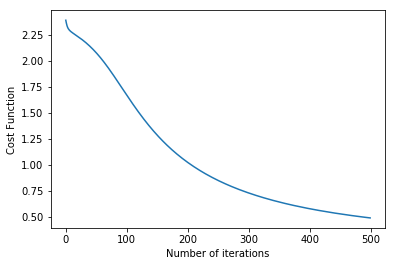

In [10]:
plt.figure()
plt.xlabel('Number of iterations')
plt.ylabel('Cost Function')
plt.plot(clf.loss_curve_)
plt.show()

## Visualizing the result on test set

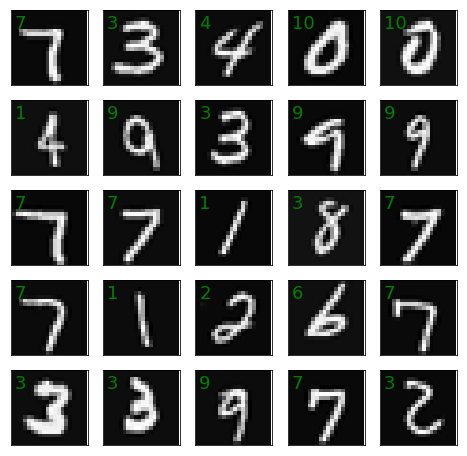

In [11]:
# Randomly select 25 samples from the test set.
indxs = np.random.choice(X_test.shape[0], 25, replace = False)

# Create a new figure with 25 axes objects inside it (subplots).
fig, axs = plt.subplots(5, 5, sharex = True, sharey = True, figsize = (8, 8))
axs = axs.flatten()

for i, indx in enumerate(indxs):
    img = np.reshape(X_test[indx], (20, 20), order = 'F')
    label = str(clf.predict(X_test[indx].reshape(1, -1))[0])
    
    # Plot the image along with the label it is predicted.
    axs[i].imshow(img, cmap = 'gray', interpolation = 'None')
    axs[i].annotate(label, xy = (0.05, 0.75), xycoords = 'axes fraction', color = 'green', fontsize = 18)
    axs[i].set_xticks(())
    axs[i].set_yticks(())
    
plt.show()
    